# Cointegration

# Exercise 1
In R, two series can be tested for cointegration using the **Phillips-Ouliaris**
test implemented in the function **po.test** within the **tseries** library. 

The
function requires the series be given in **matrix form** and produces the results
for a test of the **null hypothesis that the two series are not cointegrated**. 

As an
example, we simulate two cointegrated series x and y that share the stochastic
trend $\mu$ and test for cointegration using po.test:


In [1]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
x <- y <- mu <- rep(0, 1000)
for (i in 2:1000) mu[i] <- mu[i - 1] + rnorm(1)
x <- mu + rnorm(1000)
y <- mu + rnorm(1000)


In [3]:
adf.test(x)$p.value

[1] 0.4928375

In [4]:
adf.test(y)$p.value

[1] 0.5343721

we cannot reject $H_0$, therefore $x$ is not stationary. The same goes for *y* timeseries.

In [5]:
po.test(cbind(x, y))

Warning message in po.test(cbind(x, y)):
"p-value smaller than printed p-value"



	Phillips-Ouliaris Cointegration Test

data:  cbind(x, y)
Phillips-Ouliaris demeaned = -986.03, Truncation lag parameter = 9,
p-value = 0.01


The po.test provides evidence
that the series are cointegrated since the null hypothesis is rejected at the 1% level.

# Exercise 2

# The daily exchange rate series for UK pounds, the Euro, and New Zealand dollars, 
given for the period January 2004 to December 2007,
are all per US dollar is described by the dataset us_rates.dat.

Since the United Kingdom is part of the European Economic Community (EEC),
any change in the Euro exchange rate is likely to be apparent in the UK
pound exchange rate, so there are likely to be fluctuations common to both
series; in particular, the two series may share a common stochastic trend.


In [7]:
file<-"C:/users/Enric/Downloads/us_rates.dat"

xrates <- read.table(file, header = T)
xrates[1:3,]

,UK,NZ,EU
,<dbl>,<dbl>,<dbl>
1,0.55834,1.5168,0.79419
2,0.55288,1.4884,0.78860
3,0.54803,1.4885,0.78284


The correlogram plots of the differenced UK and EU series indicate that both exchange rates can be well approximated by random
walks 

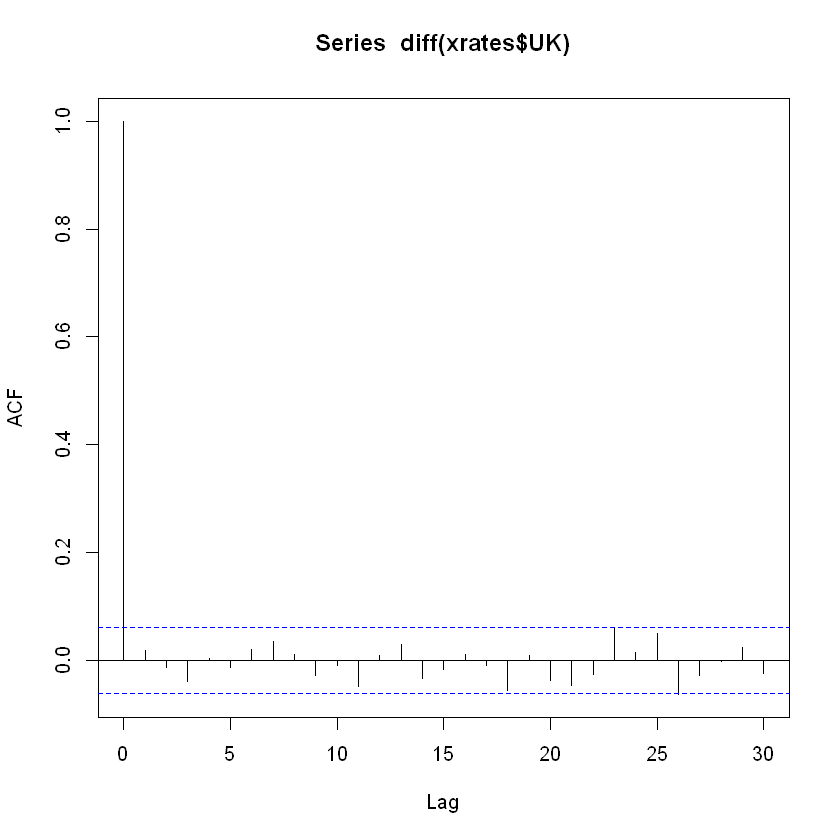

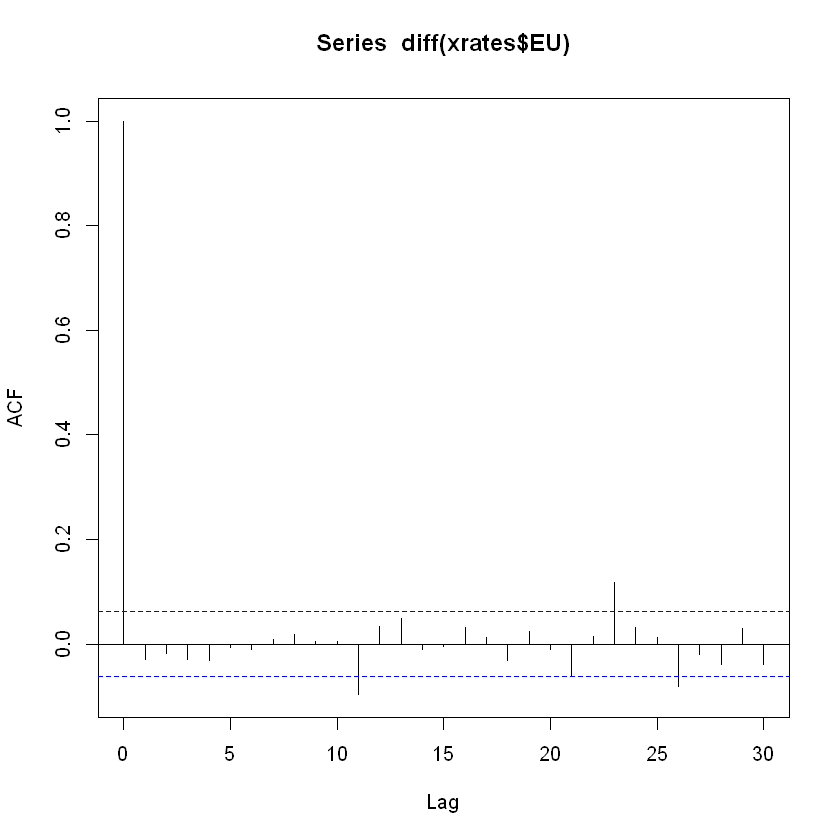

In [8]:
acf( diff(xrates$UK) )
acf( diff(xrates$EU) )

whilst the scatter plot of the rates shows a strong linear
relationship

[1] 0.9462121

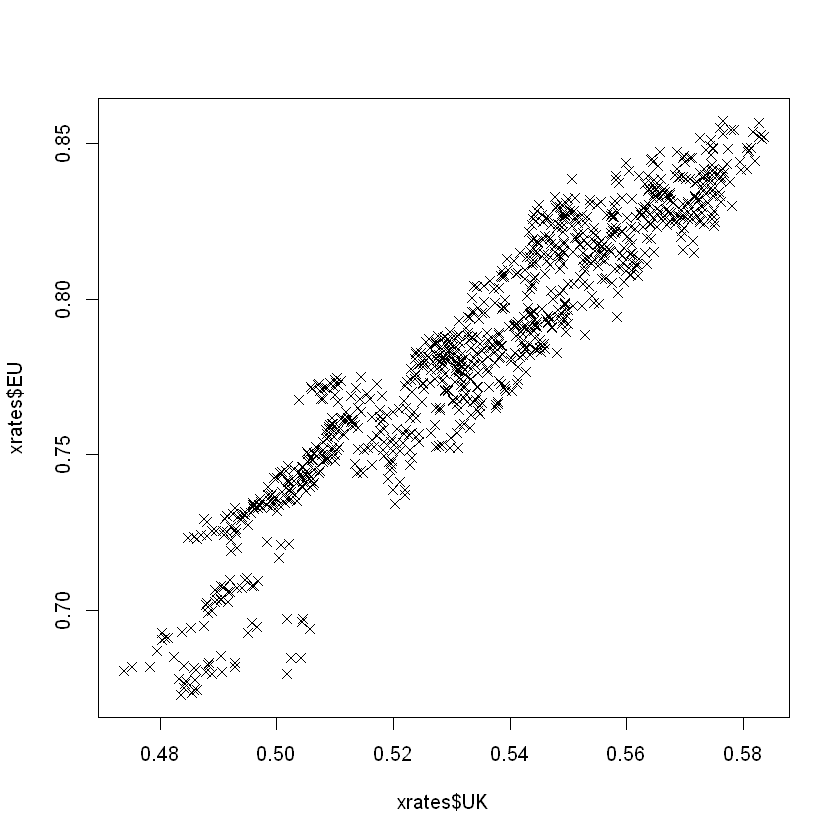

In [9]:
plot(xrates$UK, xrates$EU, pch = 4)
cor(xrates$UK, xrates$EU)

## Phillips-Ouliaris cointegration test

**The Phillips-Ouliaris test shows there is evidence that the series are
cointegrated, which justifies the use of a regression model.**

An **ARIMA model is then fitted to the residuals of the regression model**. 

The ar function is used to determine the best order of an AR process. We can investigate the adequacy of our cointegrated model by using R to fit a more general ARIMA process to the residuals.

The best-fitting ARIMA model has d = 0, which is consistent with the residuals being a realisation of a stationary process and hence the series being cointegrated.



In [10]:
po.test(cbind(xrates$UK, xrates$EU))


	Phillips-Ouliaris Cointegration Test

data:  cbind(xrates$UK, xrates$EU)
Phillips-Ouliaris demeaned = -21.662, Truncation lag parameter = 10,
p-value = 0.04118


In [11]:
ukeu.lm <- lm(xrates$UK ~ xrates$EU)

ukeu.res <- resid(ukeu.lm)



[1] 3

# Order of AR model of the residuals via ar function

In [12]:
ukeu.res.ar <- ar(ukeu.res)
ukeu.res.ar$order

[1] 3

# Improve the result, if possible, with AIC

In [13]:
AIC(arima(ukeu.res, order = c(3, 0, 0)))

[1] -9886.26

In [14]:
AIC(arima(ukeu.res, order = c(2, 0, 0)))

[1] -9886.157

In [15]:
AIC(arima(ukeu.res, order = c(1, 1, 0)))

[1] -9875.723

Comparing the AICs for the AR(2) and AR(3) models, it is clear there is
little difference and that the AR(2) model would be satisfactory. 

The example
above also shows that the AR models provide a better fit to the residual
series than the ARIMA(1, 1, 0) model, so the residual series may be treated
as stationary. 

This supports the result of the Phillips-Ouliaris test since a
linear combination of the two exchange rates, obtained from the regression
model, has produced a residual series that appears to be a realisation of a
stationary process.

